<a href="https://colab.research.google.com/github/Pengyu-gis/MyDeepLearing/blob/main/ObjectDetection/detr_resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install timm

In [13]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image, ImageDraw
import requests

In [ ]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

In [18]:
url = "https://www.ourgoldenage.com.au/film/roman-holiday/GAC_Roman%20Holiday.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [19]:
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# create a draw object
draw = ImageDraw.Draw(image)
draw

In [20]:
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    
    # add box
    draw.rectangle(box, outline="red")
    draw.text((box[0], box[1] - 10), f"{model.config.id2label[label.item()]} ({round(score.item(), 3)})", fill="red")
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected car with confidence 0.998 at location [1479.62, 561.27, 1637.42, 639.7]
Detected tie with confidence 0.956 at location [1436.02, 547.0, 1451.31, 604.45]
Detected person with confidence 0.938 at location [46.3, 573.69, 77.31, 637.78]
Detected tie with confidence 0.966 at location [838.42, 462.05, 953.55, 694.81]
Detected tie with confidence 0.985 at location [584.99, 400.92, 633.89, 481.54]
Detected person with confidence 0.957 at location [1738.16, 559.89, 1769.02, 633.89]
Detected person with confidence 0.989 at location [244.76, 144.76, 1227.61, 1184.65]
Detected person with confidence 0.993 at location [1393.25, 532.15, 1439.87, 676.76]
Detected car with confidence 0.942 at location [173.87, 577.09, 238.09, 623.93]
Detected person with confidence 0.999 at location [1105.89, 496.92, 1208.53, 721.73]


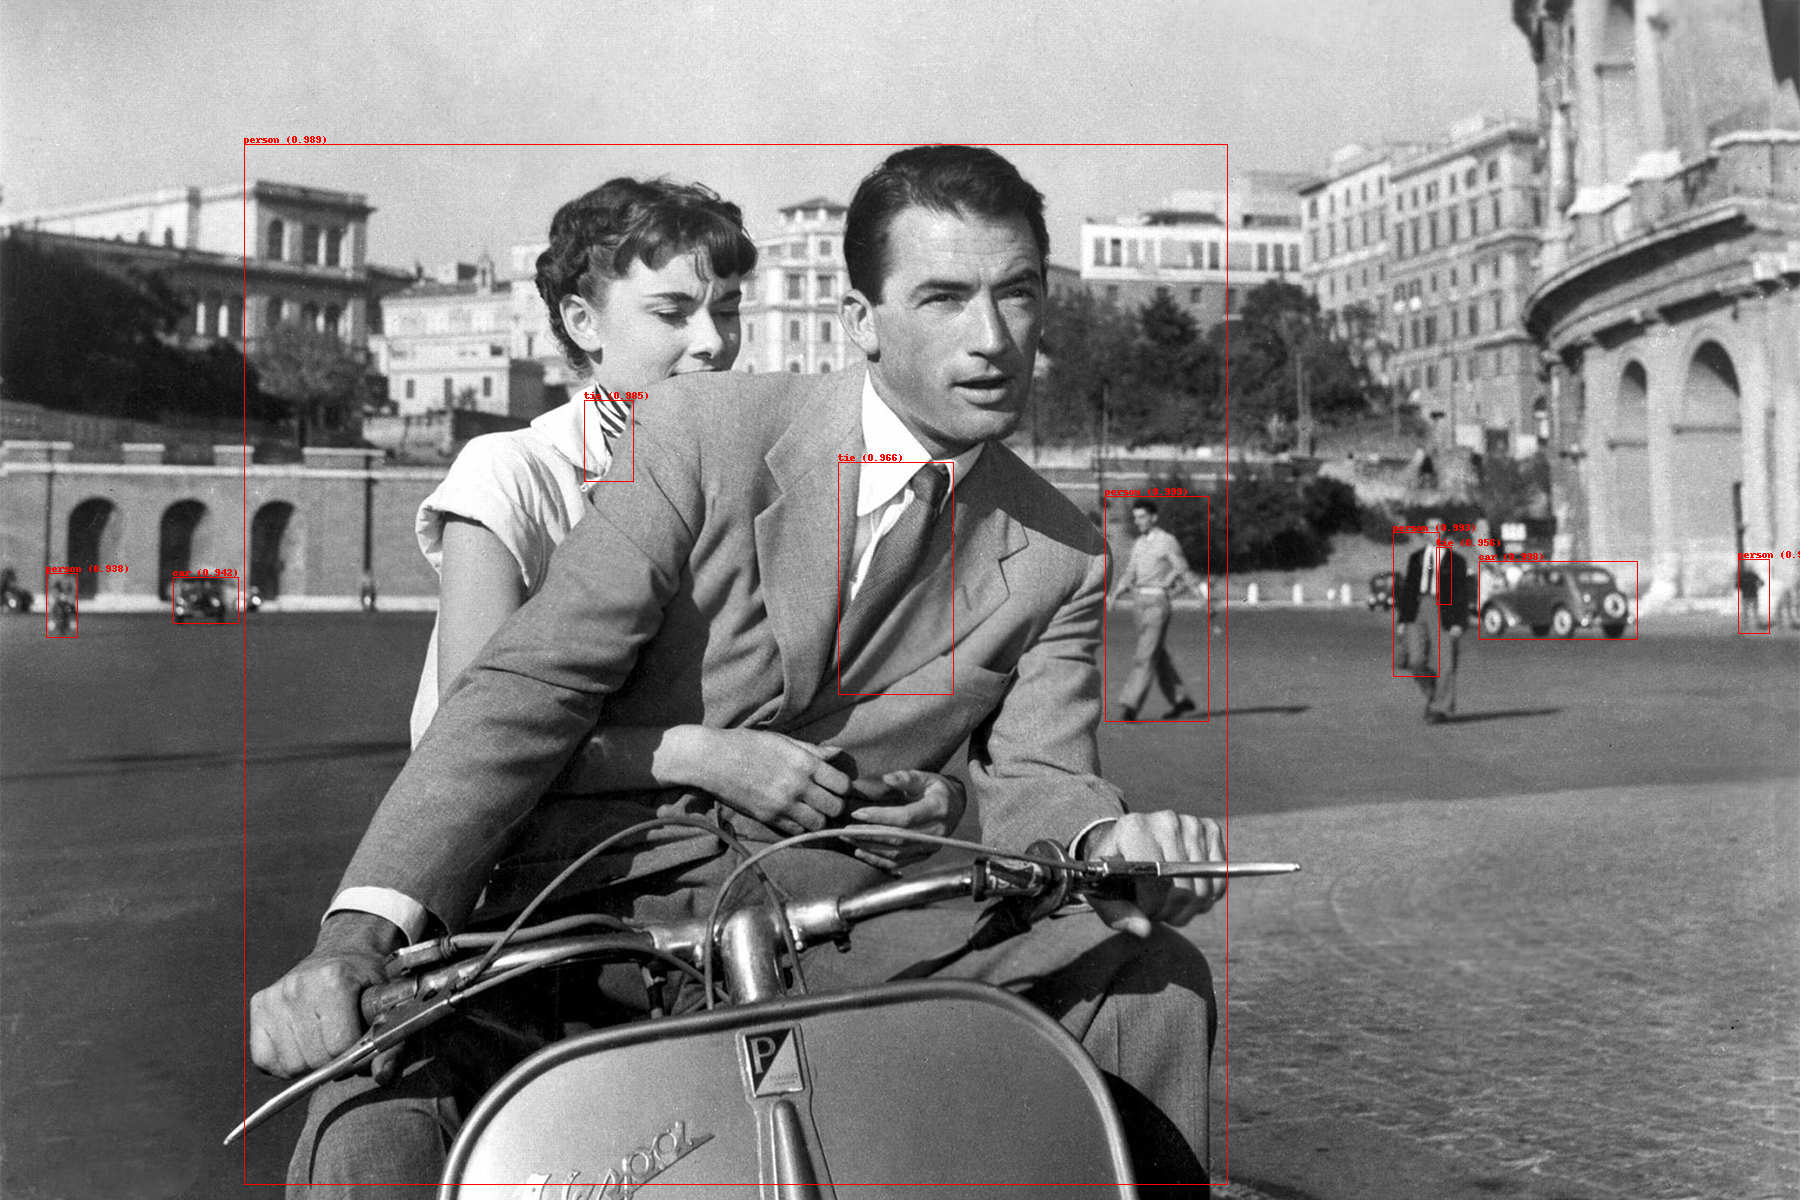

In [21]:
# show the image
image.show()